<a href="https://colab.research.google.com/github/Edu-Moreira/Edu-Moreira/blob/main/Curva_de_Juros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install investpy

     |████████████████████████████████| 4.4 MB 4.3 MB/s 
     |████████████████████████████████| 235 kB 47.1 MB/s 
     |████████████████████████████████| 6.4 MB 31.9 MB/s 
     |████████████████████████████████| 503 kB 40.0 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=7ab78f44c7f93043cf7ef0b4ab7fac593f29451276f36ca0a1c4b2a65c1bf662
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import investpy as inv
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [3]:
juros =inv.get_bonds_overview('brazil')
juros

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,12.446,11.763,11.775,11.763,+0.683,+5.81%
1,brazil,Brazil 6M,12.969,12.420,12.969,12.969,+0.000,+0.00%
2,brazil,Brazil 9M,13.093,12.730,12.765,12.730,+0.363,+2.85%
3,brazil,Brazil 1Y,13.137,12.970,12.970,12.970,+0.168,+1.29%
4,brazil,Brazil 2Y,11.993,12.645,12.820,12.645,-0.652,-5.16%
5,brazil,Brazil 3Y,12.240,12.143,12.510,12.143,+0.097,+0.80%
6,brazil,Brazil 5Y,12.096,12.125,12.355,12.125,+-0.029,+-0.24%
7,brazil,Brazil 8Y,12.081,12.130,12.360,12.130,+-0.049,+-0.40%
8,brazil,Brazil 10Y,12.088,12.135,12.345,12.135,+-0.047,+-0.39%


In [4]:
vertice=[]

for i in range(len(juros)):
  list_name= juros['name']
  list_name = list_name[i][-3:]
  list_name = list_name[:-1]
  list_name= int(list_name) 
  vertice.append(list_name)

base_temp = []
for i in range(len(juros)):
  list_temp= juros['name']
  list_temp = list_temp[i][-3:]
  list_temp = list_temp[-1:]
  if list_temp == 'Y':
    list_temp = 252
  else:
    list_temp = 21
  base_temp.append(list_temp)

vertices_dias = []
for i in range(len(juros)):
  cont = vertice[i]*base_temp[i]
  vertices_dias.append(cont)

In [5]:
juros['vertices']  = vertices_dias

juros = juros.sort_values('vertices')

juros

,country,name,last,last_close,high,low,change,change_percentage,vertices
0,brazil,Brazil 3M,12.446,11.763,11.775,11.763,+0.683,+5.81%,63
1,brazil,Brazil 6M,12.969,12.420,12.969,12.969,+0.000,+0.00%,126
2,brazil,Brazil 9M,13.093,12.730,12.765,12.730,+0.363,+2.85%,189
3,brazil,Brazil 1Y,13.137,12.970,12.970,12.970,+0.168,+1.29%,252
4,brazil,Brazil 2Y,11.993,12.645,12.820,12.645,-0.652,-5.16%,504
5,brazil,Brazil 3Y,12.240,12.143,12.510,12.143,+0.097,+0.80%,756
6,brazil,Brazil 5Y,12.096,12.125,12.355,12.125,+-0.029,+-0.24%,1260
7,brazil,Brazil 8Y,12.081,12.130,12.360,12.130,+-0.049,+-0.40%,2016
8,brazil,Brazil 10Y,12.088,12.135,12.345,12.135,+-0.047,+-0.39%,2520


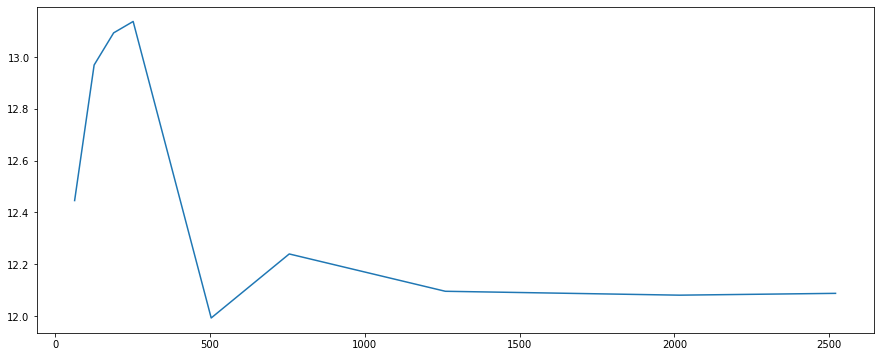

In [6]:
plt.figure(figsize = (15,6))

plt.plot(juros['vertices'],juros['last'] )

In [7]:
nome_vertices  = list(juros['name'])

painel = pd.DataFrame()

for i in nome_vertices:
  painel [i]= inv.get_bond_historical_data(bond = i,from_date = '01/01/2020', to_date = '18/03/2022',interval = 'Monthly')['Close']

painel

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2020-01-01,4.233,4.205,4.280,4.515,4.870,5.185,6.145,6.485,6.700
2020-02-01,4.178,4.100,4.090,4.240,4.530,4.820,6.060,6.515,6.780
2020-03-01,3.425,3.240,3.380,3.630,4.425,5.865,6.675,7.330,7.650
2020-04-01,3.124,2.920,2.980,3.185,4.040,5.495,6.380,7.200,7.580
2020-05-01,2.690,2.325,2.495,2.630,3.510,4.852,5.760,6.585,6.960
2020-06-01,2.055,2.140,2.160,2.370,3.305,4.650,5.485,6.305,6.710
2020-07-01,2.080,1.990,2.230,2.490,3.280,4.265,5.035,5.900,6.300
2020-08-01,2.185,2.370,2.655,2.655,3.605,4.785,5.720,6.565,6.920
2020-09-01,2.220,2.250,2.485,2.830,3.485,5.310,6.200,7.114,7.340
